## Increase versatility of coupled dipole code

Currently, I have to make a for loop to generate a spectrum. I would like to just be able to give the code an array of omega's, and it automaticallly returns the arrayed spectrum. I will also need to do this for the radii and position inputs.


In [1]:
from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]


## Two Spheres


In [2]:
num_part_per_struct = 2
w_all = np.arange(2,3,.01)/hbar_eVs
num_freq = len(w_all)
gap = np.array([100, 30, 20, 10, 7])
num_gap = len(gap)
radius = 10

def_centers = np.zeros((num_gap, num_freq, num_part_per_struct, 3)) # [number of unique structures, number of particles per structure, 3 cart. coords]
def_all_radii = np.zeros((num_gap, num_freq, num_part_per_struct)) # [number of unique structures, number of particles per structure, 1]


for gap_i in range(0, num_gap):
    def_centers[gap_i, :, 0,:] = np.array([ 0, 0, -radius-gap[gap_i]/2 ])*1.E-7
    def_centers[gap_i, :, 1,:] = np.array([ 0, 0, radius+gap[gap_i]/2 ])*1.E-7

def_all_radii[:,:,0] = radius*1.E-7
def_all_radii[:,:,1] = radius*1.E-7


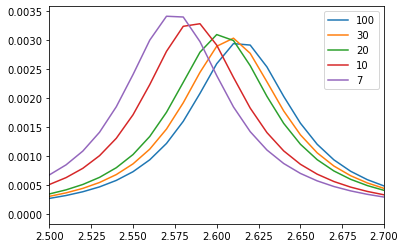

In [3]:
calc_dips = CrossSections(centers=def_centers, 
                                   all_radii=def_all_radii,
                                   w=w_all,
                                   num=num_part_per_struct, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))


for which_gap in range(0, num_gap):
    plt.plot(w_all*hbar_eVs, Pabs[which_gap,:,1]+Pabs[which_gap, :,0],label=str(gap[which_gap]))

plt.xlim([2.5, 2.7])

plt.legend()
